In [1]:
import gym
import numpy as np
import torch

from stable_baselines3 import SAC, PPO, HerReplayBuffer
from stable_baselines3.common.buffers import DictReplayBuffer
from stable_baselines3.sac.policies import MlpPolicy
from stable_baselines3.common.vec_env import DummyVecEnv, SubprocVecEnv, VecNormalize
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.utils import set_random_seed
from stable_baselines3.common.monitor import Monitor

from stable_baselines3.common import results_plotter
from stable_baselines3.common.results_plotter import load_results, ts2xy, plot_results
from stable_baselines3.common.noise import NormalActionNoise
from stable_baselines3.common.callbacks import BaseCallback

import numpy as np
import gym

from newLorenzEnv import Lorenz63Env
from stable_baselines3 import PPO
import time 
import matplotlib.pyplot as plt
from typing import Callable

import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0"

from stable_baselines3.common.evaluation import evaluate_policy

In [2]:
def make_env(env_id, rank, seed=0):
    """
    Utility function for multiprocessed env.

    :param env_id: (str) the environment ID
    :param num_env: (int) the number of environments you wish to have in subprocesses
    :param seed: (int) the inital seed for RNG
    :param rank: (int) index of the subprocess
    """
    def _init():
        env = Lorenz63Env(integ_steps = 50)
        env.seed(seed + rank)
        return env
    set_random_seed(seed+ rank)
    return _init

In [3]:
num_cpu = 70  # Number of processes to use
# Create the vectorized environment
env = SubprocVecEnv([make_env('Lorenz', rank=i) for i in range(num_cpu)])
env = VecNormalize(env, norm_obs=True, norm_reward=False)

torch.backends.cudnn.benchmark = True

neurons = [128]
LR = [0.0001]
Gamma =[0.05, 0.1, 0.2, 0.8, 0.9]
BS = [100]
vf_coeff = [0.8, 0.9]
max_grad_norm = [0.8, 0.9]


[0.05412439 0.05438807 0.05465487 ... 0.35157758 0.33611072 0.35121202]


<Figure size 640x480 with 0 Axes>

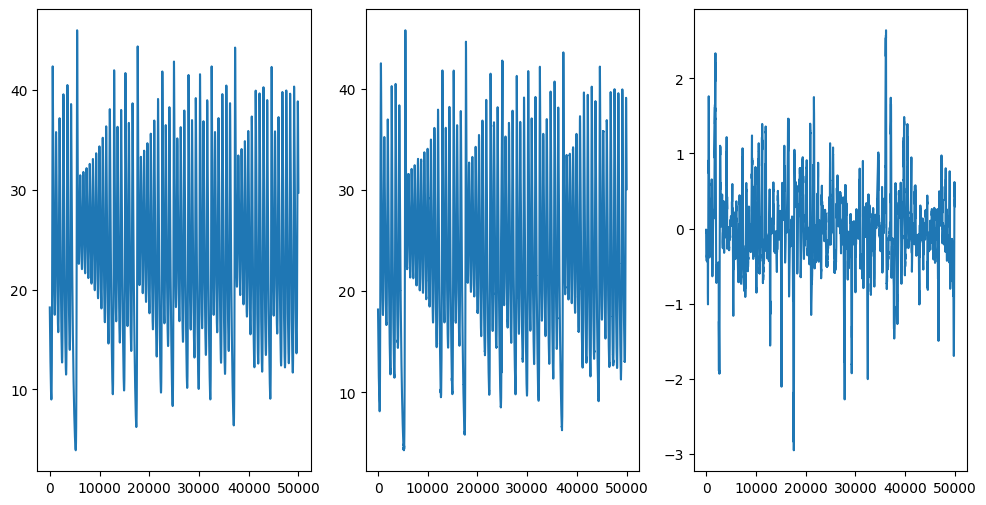

[0.10014968 0.09908682 0.09805115 ... 0.66393075 0.68697943 0.67258175]


<Figure size 640x480 with 0 Axes>

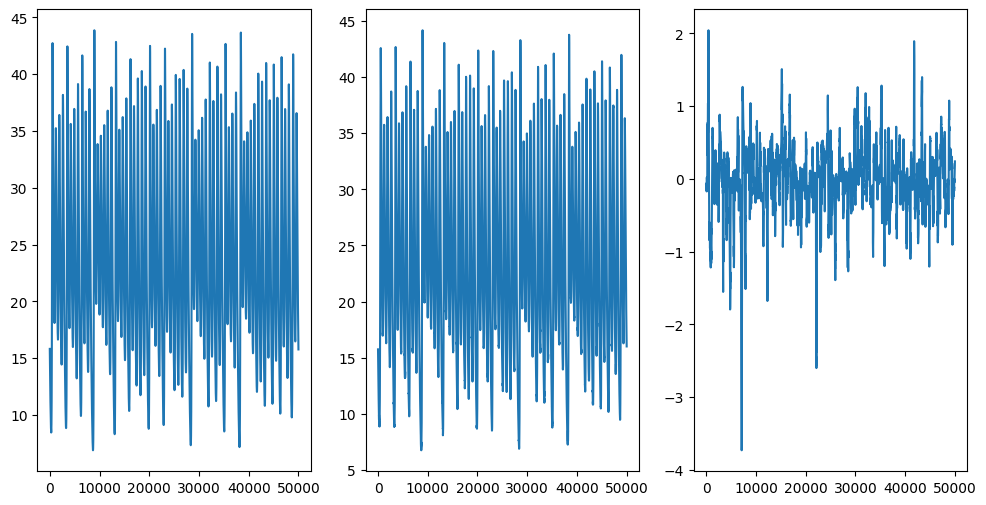

[0.08092015 0.08096528 0.08101592 ... 1.26836457 1.37408395 1.27756639]


<Figure size 640x480 with 0 Axes>

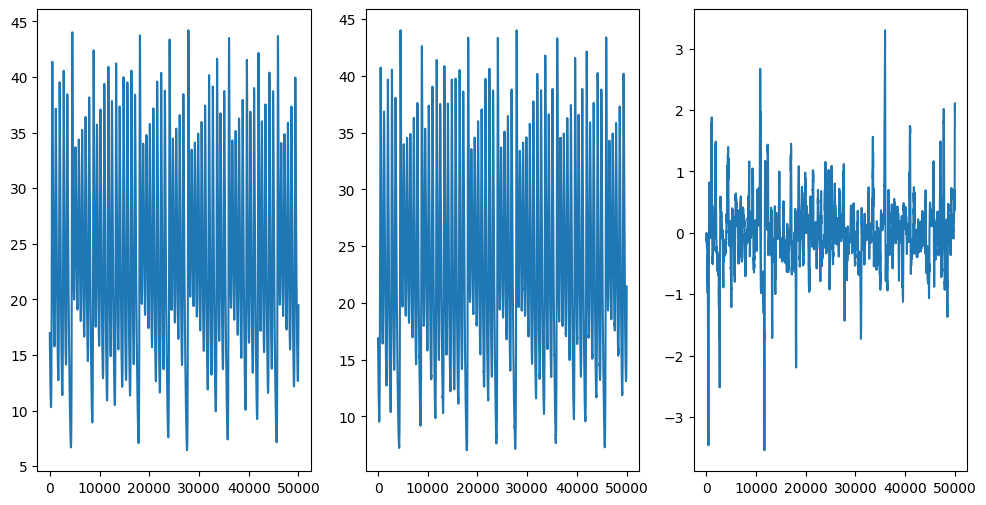

[0.12779244 0.12751136 0.1272316  ... 0.66351829 0.71227838 0.67375894]


<Figure size 640x480 with 0 Axes>

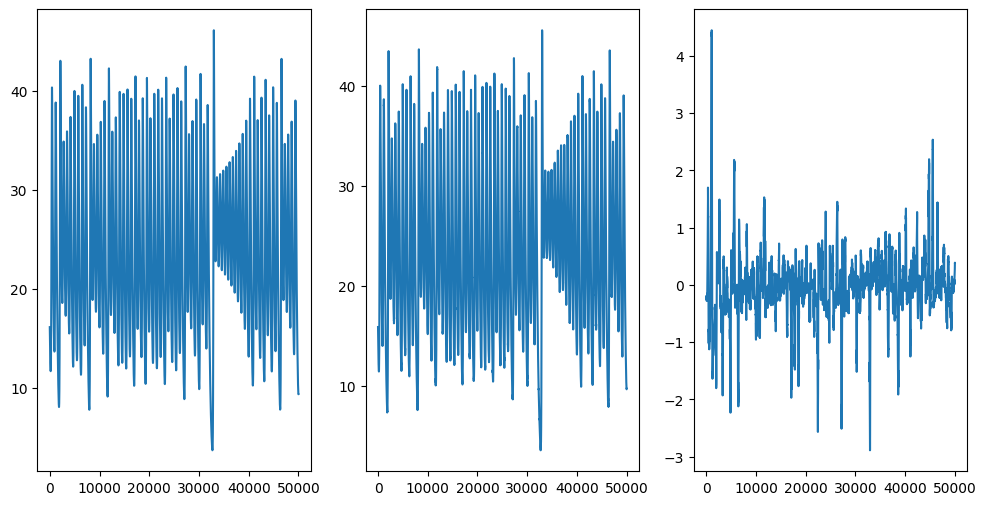

[0.18377324 0.18274678 0.18175726 ... 0.12703695 0.13723946 0.12757705]


<Figure size 640x480 with 0 Axes>

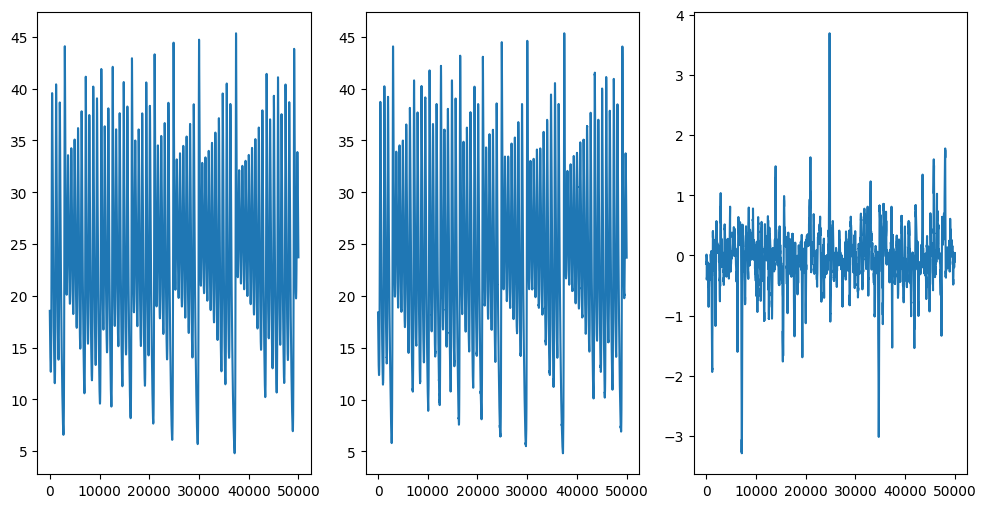

[0.16064376 0.16013007 0.15965426 ... 0.48072982 0.57472264 0.47856052]


<Figure size 640x480 with 0 Axes>

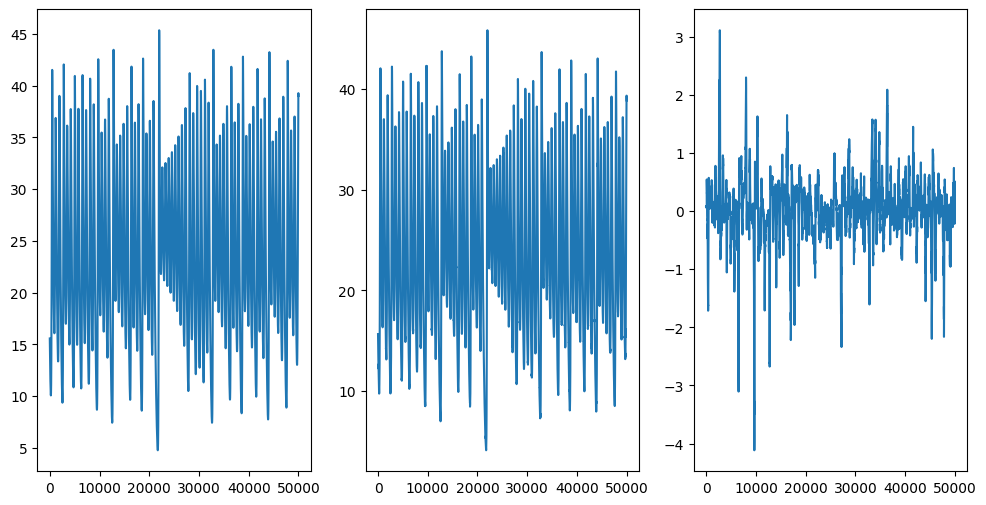

[0.11512064 0.11408903 0.11310068 ... 0.11925517 0.12774327 0.11996756]


<Figure size 640x480 with 0 Axes>

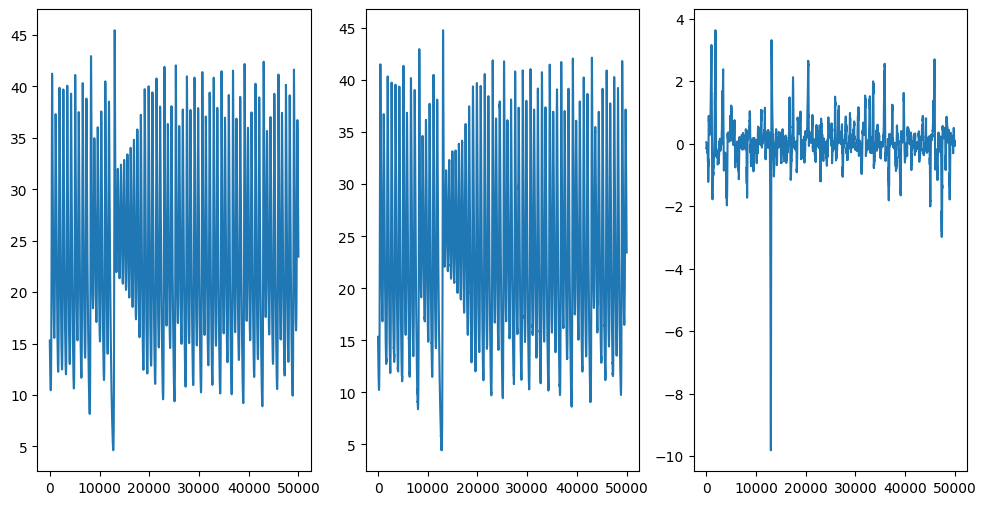

[0.06372685 0.06409766 0.06447289 ... 0.15571596 0.15418551 0.15528354]


<Figure size 640x480 with 0 Axes>

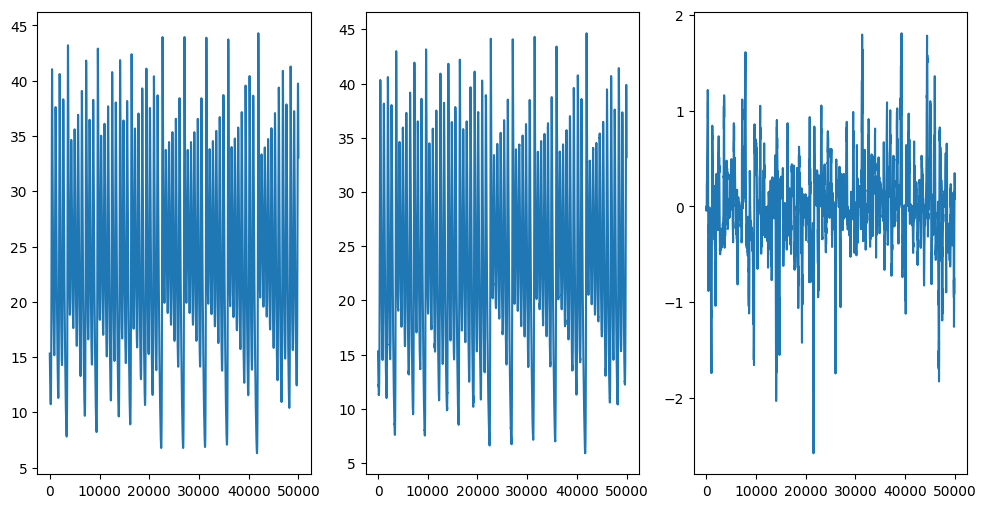

[0.23067207 0.23175071 0.23284345 ... 0.22626898 0.18485363 0.22560744]


<Figure size 640x480 with 0 Axes>

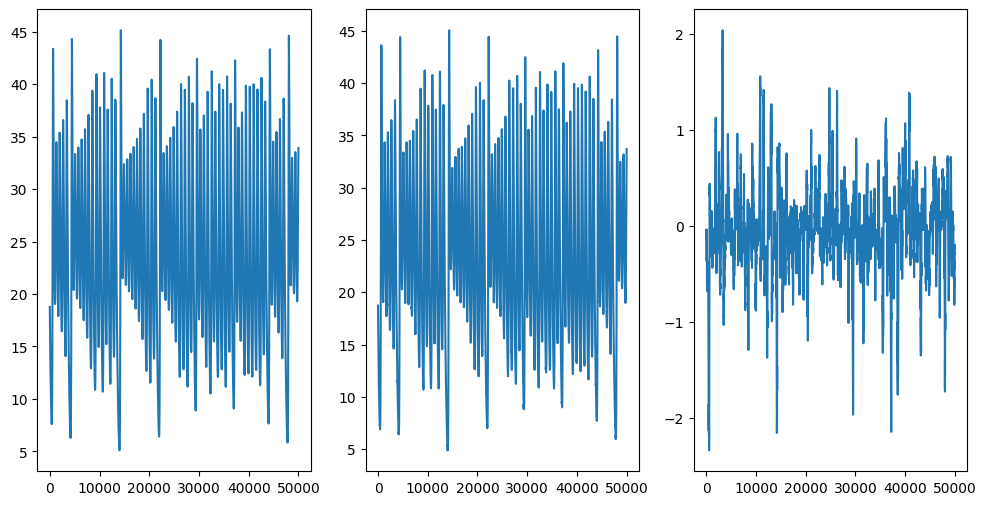

[0.12643183 0.12652985 0.12663678 ... 0.48445726 0.3855964  0.47985436]


<Figure size 640x480 with 0 Axes>

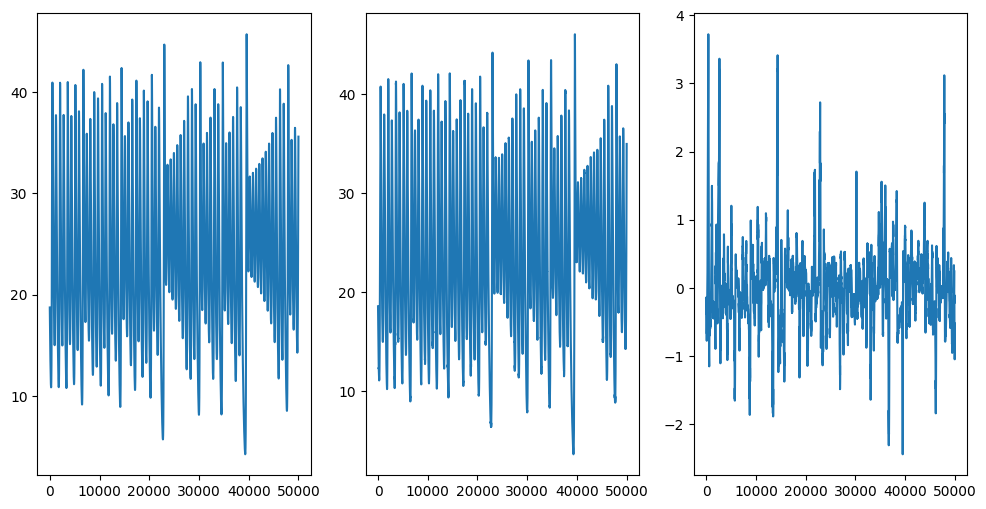

[0.07057374 0.06992301 0.06929291 ... 0.36267731 0.37338424 0.36541797]


<Figure size 640x480 with 0 Axes>

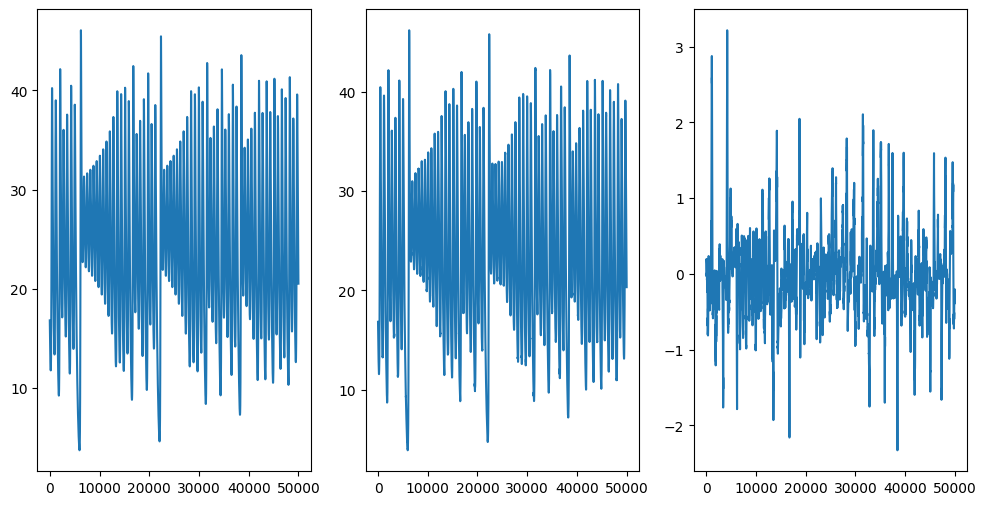

[0.04728257 0.0468757  0.04647717 ... 0.43203217 0.39978778 0.4296141 ]


<Figure size 640x480 with 0 Axes>

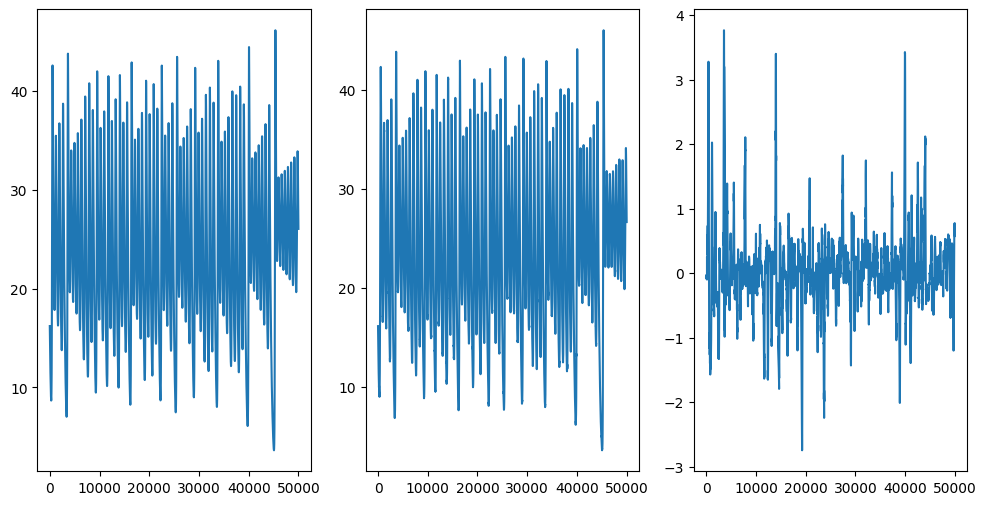

[0.06219937 0.06223315 0.06227106 ... 0.26614046 0.26370817 0.26872789]


<Figure size 640x480 with 0 Axes>

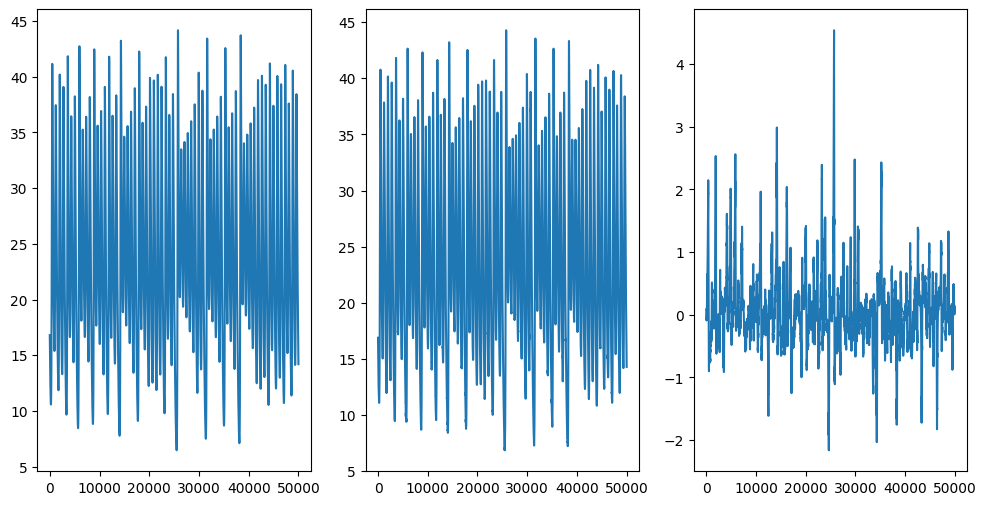

[0.10674402 0.10622299 0.10572915 ... 0.07625434 0.03602265 0.07541862]


<Figure size 640x480 with 0 Axes>

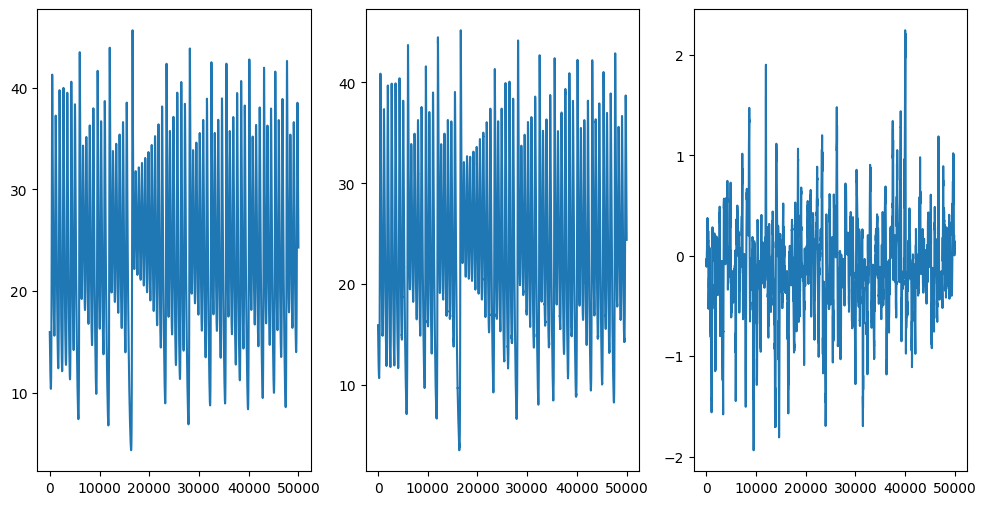

[0.16133978 0.16137543 0.1614184  ... 1.57491726 1.64633037 1.59899137]


<Figure size 640x480 with 0 Axes>

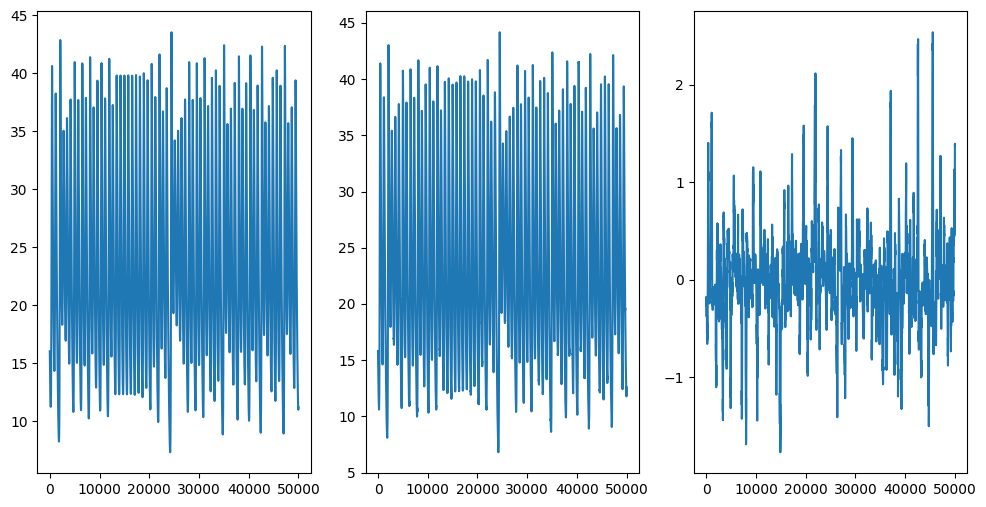

[0.07113244 0.07137536 0.07162582 ... 0.15114135 0.16365697 0.14899676]


<Figure size 640x480 with 0 Axes>

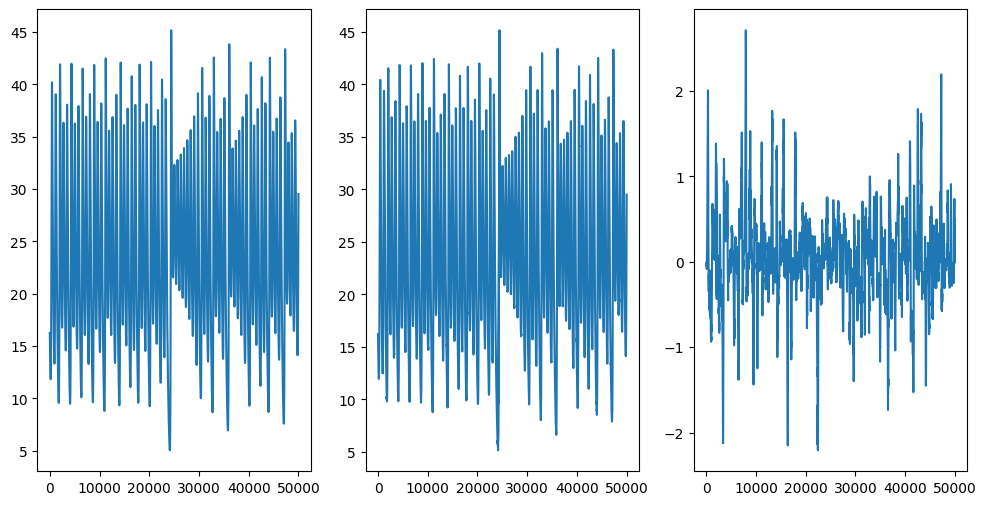

[0.14812445 0.14815353 0.14821206 ... 0.10823842 0.09338105 0.1059159 ]


<Figure size 640x480 with 0 Axes>

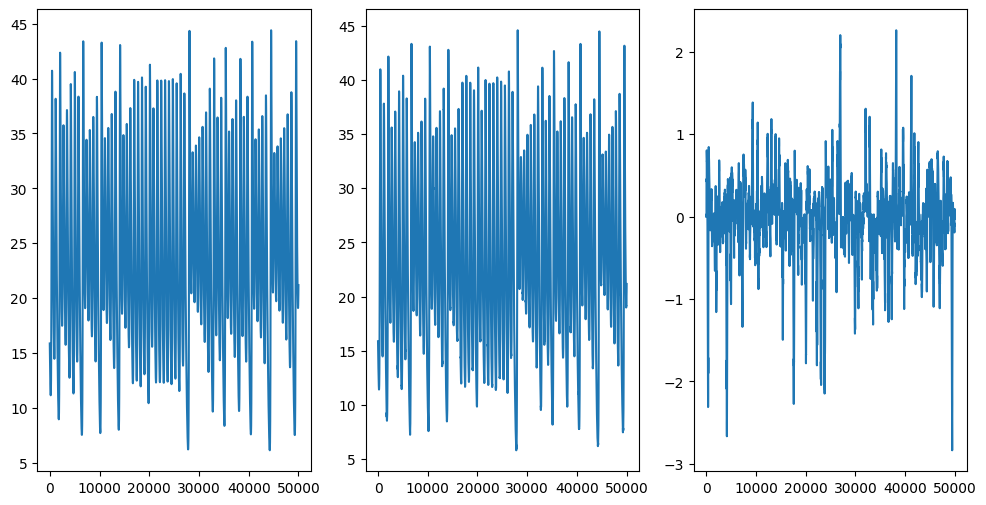

[0.05915477 0.05902088 0.05888784 ... 0.06483001 0.08680814 0.06469048]


<Figure size 640x480 with 0 Axes>

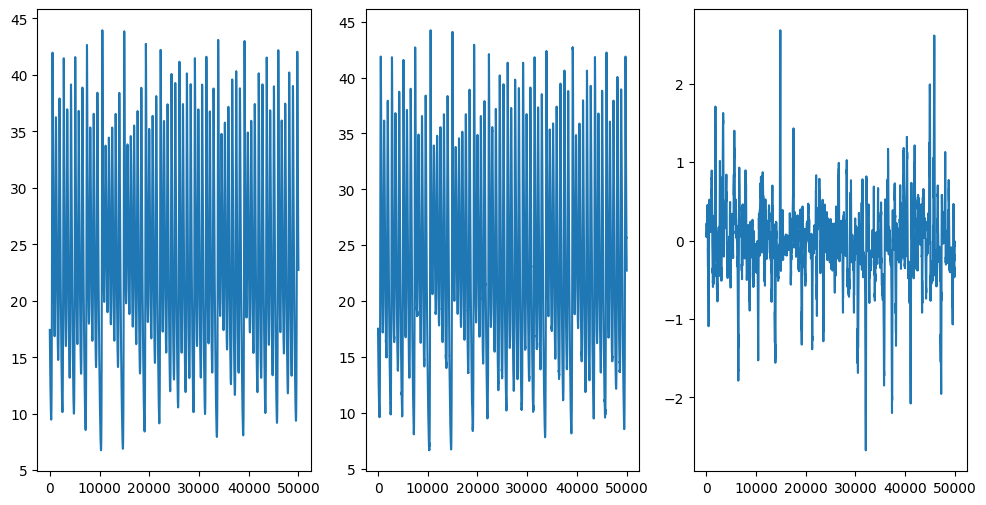

[0.20888761 0.20573316 0.20263074 ... 0.33672579 0.39175546 0.33271079]


<Figure size 640x480 with 0 Axes>

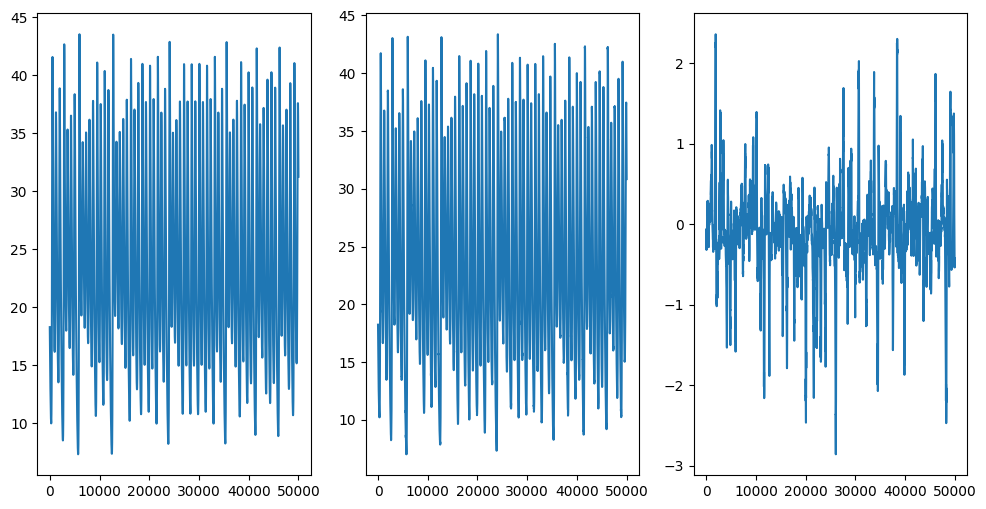

[0.0343523  0.03442745 0.03450544 ... 0.68088333 0.7103649  0.68984918]


<Figure size 640x480 with 0 Axes>

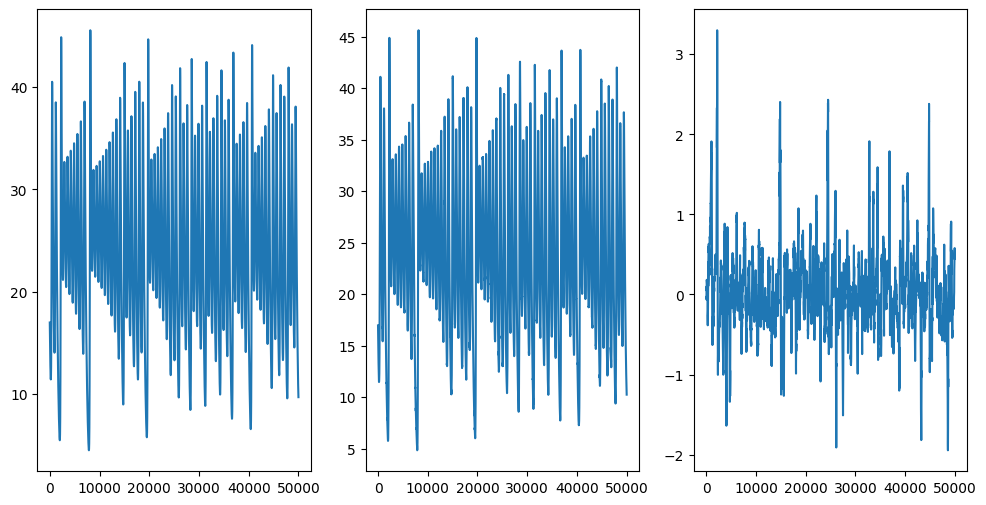

In [4]:
for neuron in neurons:
    for lr in LR:
        for gamma in Gamma:
            for bs in BS:
                for max_grad_norms in max_grad_norm:
                    for vf in vf_coeff:
                        env = SubprocVecEnv([make_env('Lorenz', rank=i) for i in range(num_cpu)])
                        env = VecNormalize(env, norm_obs=True, norm_reward=False)

                        torch.backends.cudnn.benchmark = True

                        model = PPO.load('trainedModels_assimSteps50_obsNosie1.0_vAction/'+'neurons'+str(neuron)+'_LR'+str(lr)+'_Gamma'+str(gamma)+'_BS'+str(bs)+'_totSteps5000000_assimStep50_obsNosie1.0_maxgradnorm'+str(max_grad_norms)+'_vfcoeff'+str(vf)+'/'+'PPO_Lorenz63', env=env)
                        obs = env.reset()

                        solution = []
                        ref_soln = []
                        rewards_ = []

                        for _ in range(int(1000)):
                            action, _states = model.predict(obs, deterministic=True)
                            obs, rewards, dones, info = env.step(action)
                            trueObs = env.get_original_obs()
                            trueRew = env.get_original_reward()
                            trueRef = env.env_method("_get_ref", 1)

                            solution.append(trueObs)
                            ref_soln.append(trueRef)
                            rewards_.append(trueRew)

                        sol2 = np.asarray(solution)
                        solR = np.asarray(ref_soln)

                        counter = 0
                        x = np.zeros(int(50*1000))
                        y = np.zeros(int(50*1000))
                        z = np.zeros(int(50*1000))

                        xR = np.zeros(int(50*1000))
                        yR = np.zeros(int(50*1000))
                        zR = np.zeros(int(50*1000))


                        inst = 1
                        for i in range(int(1000)):
                            for j in range(50):
                                if j<50-2:
                                    x[counter] = sol2[i, inst, j*6 + 3]
                                    y[counter] = sol2[i, inst, j*6 + 4]
                                    z[counter] = sol2[i, inst, j*6 + 5]
                                else:
                                    x[counter] = sol2[i, inst, -3]
                                    y[counter] = sol2[i, inst, -2]
                                    z[counter] = sol2[i, inst, -1]
                                
                                xR[counter] = solR[i, inst, j*3 + 0]
                                yR[counter] = solR[i, inst, j*3 + 1]
                                zR[counter] = solR[i, inst, j*3 + 2]
                                counter += 1

                        RMSE = (1/np.sqrt(3))*np.sqrt((x-xR)**2 + (y-yR)**2 + (z-zR)**2)
                        print(RMSE)


                        t1 = np.arange(0, 50, 0.001)

                        plt.clf()
                        plt.figure(figsize=(12, 6))
                        fig1 = plt.gcf()

                        plt.subplot(1, 3, 2)
                        plt.plot(z)  # Plot some data on the axes.
                        # plt.xlim((0, 1700))
                        plt.subplot(1, 3, 1)
                        plt.plot(zR)  # Plot some data on the axes.
                        # plt.xlim((0, 1700))
                        plt.subplot(1, 3, 3)
                        plt.plot(z-zR)  # Plot some data on the axes.
                        plt.show()
                        fig1.savefig('figs/neurons'+str(neuron)+'_LR'+str(lr)+'_Gamma'+str(gamma)+'_BS'+str(bs)+'_totSteps5000000_assimStep50_obsNosie1.0_maxgradnorm'+str(max_grad_norms)+'_vfcoeff'+str(vf)+'.png')



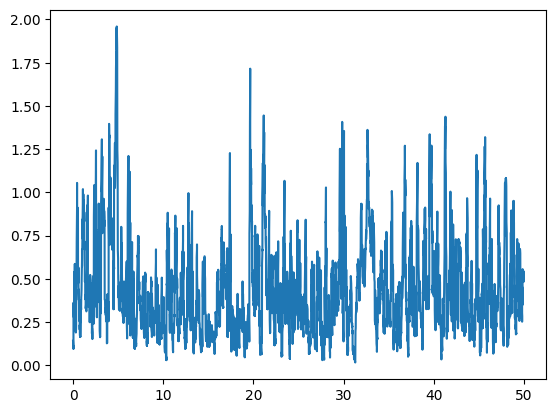

In [5]:
# t1 = np.arange(0, 25, 0.001)

# plt.figure(figsize=(12, 6))
plt.plot(t1, RMSE, label='x')

In [6]:
# trainedModels_withNoise_POMDP_X_noActionLimit_v2